In [1]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, beuler, leapfrog, runge, midpoint
import numpy as np

### Problem Accuracy

In order to investigate these two approaches to improving the accuracy of an approximation, you can use the code in
[terror.ipynb](https://github.com/rhwhite/numeric_2024/blob/main/numlabs/lab2/terror2.ipynb)
to play with the solutions to the heat conduction equation. You will need the additional functions provided for this lab. These can be found on your local computer: numeric_2024/numlabs/lab2 (you will need to fetch upstream from github to get recent changes from our version to your clone before pulling those changes to your local machine; don't forget to commit your previous labs!). For a given function $\lambda(T)$, and specified parameter values, you should experiment with various time steps and schemes, and compare the computed results (Note: only the answers to the assigned questions need to be handed in). Look at the different schemes (euler, leap-frog, midpoint, 4th order runge kutta) run them for various total times (tend) and step sizes (dt=tend/npts).

The three schemes that will be used here are forward Euler (first order), leap-frog (second order) and the fourth order Runge-Kutta scheme (which will be introduced more thoroughly in Lab 4).

Try three different step sizes for all three schemes for a total of 9 runs. It’s helpful to be able to change the axis limits to look at various parts of the plot.

In [2]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
    'midpoint': midpoint
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp

#### Step Size = 0.33

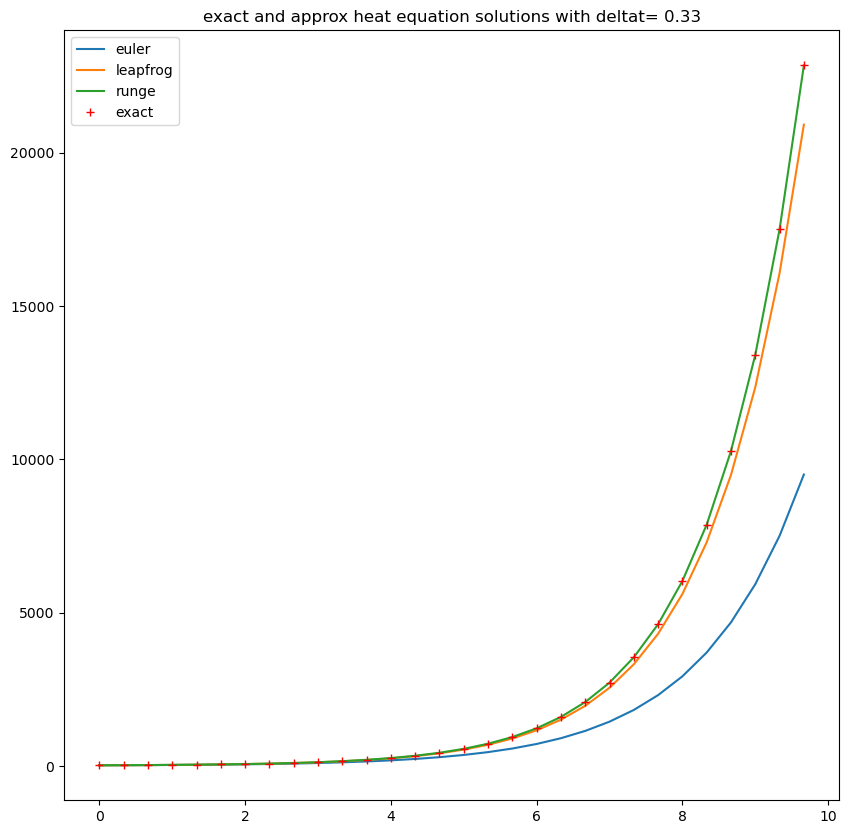

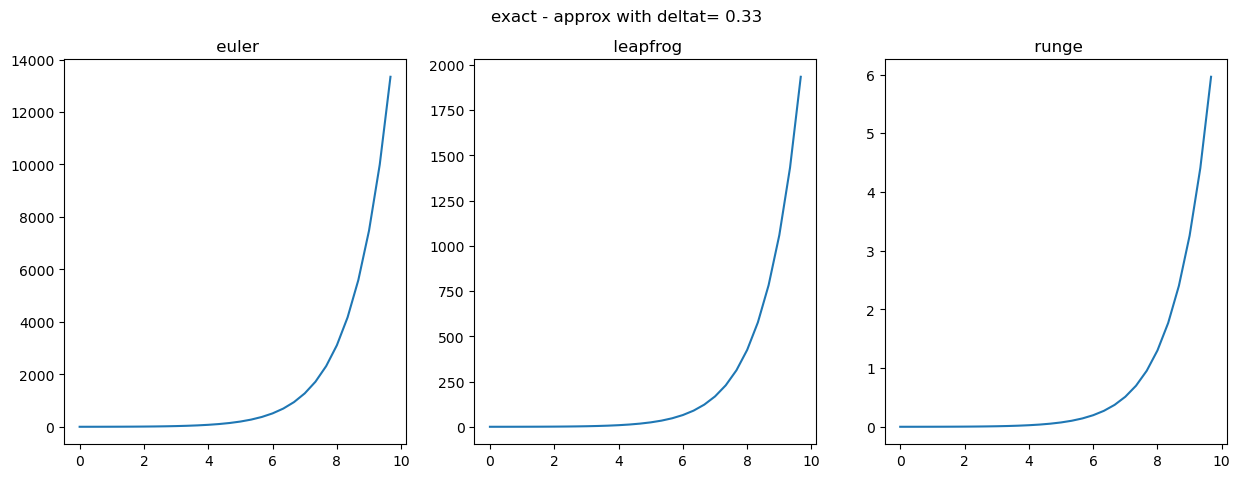

In [3]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 30

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = ['euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

In [4]:
#### Step Size = 0.1

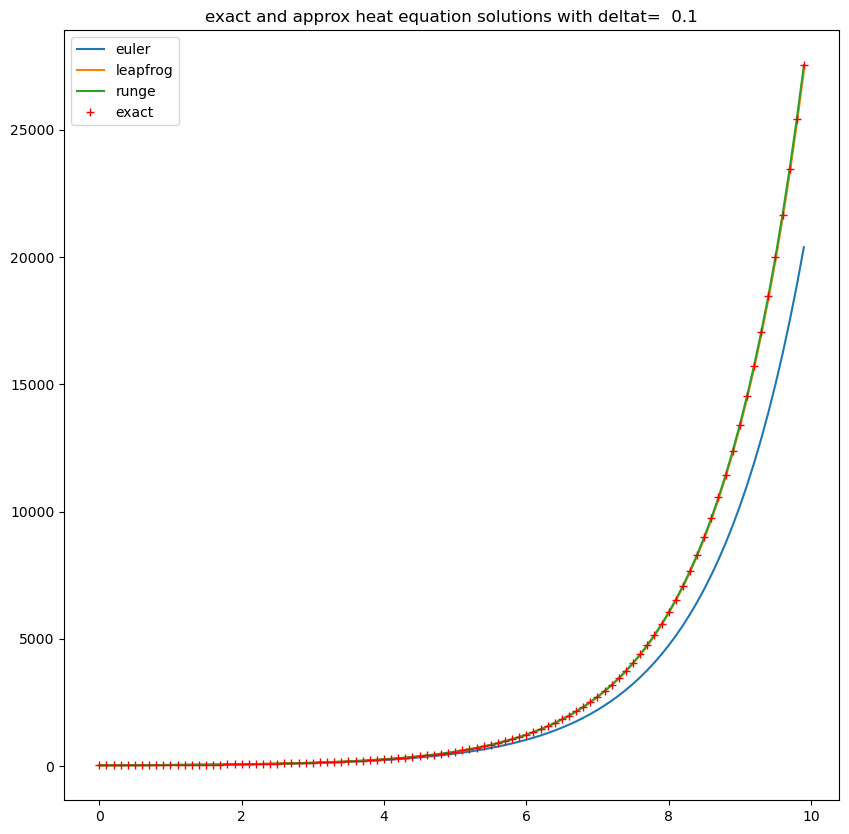

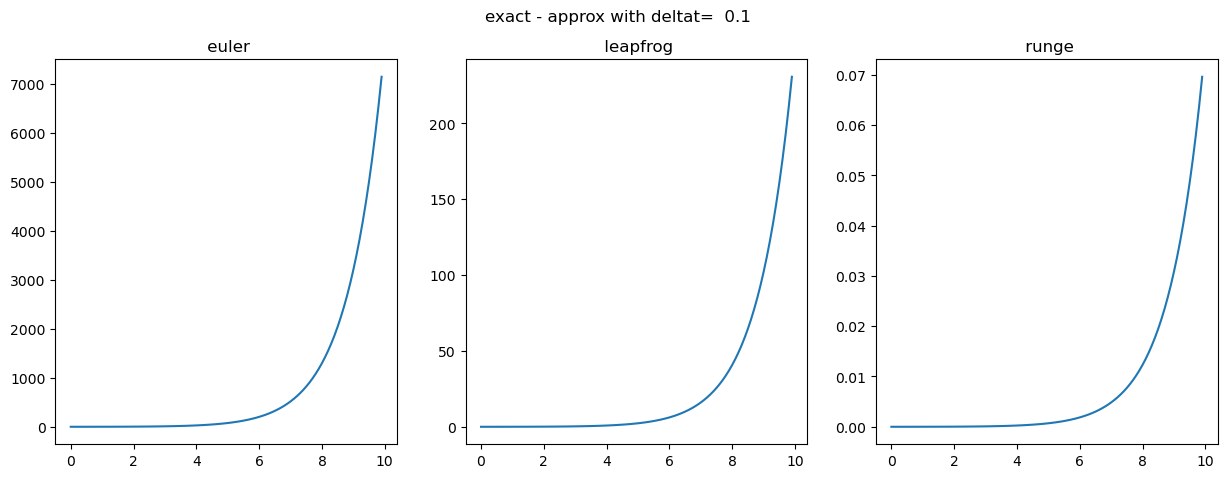

In [5]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 100

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = [ 'euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

In [6]:
#### Step Size = 0.01

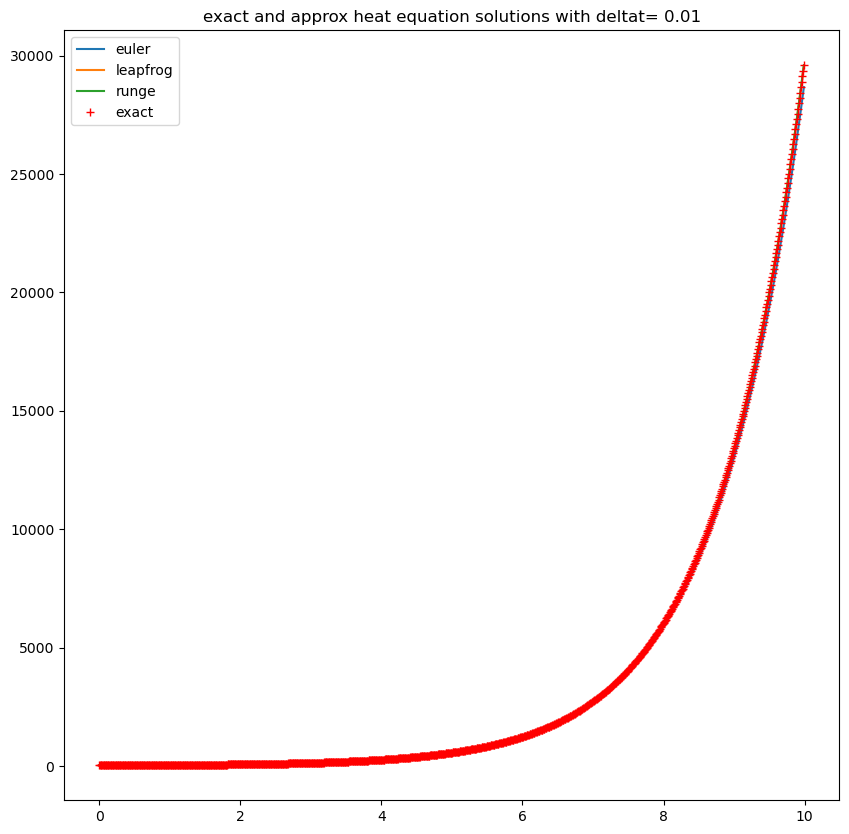

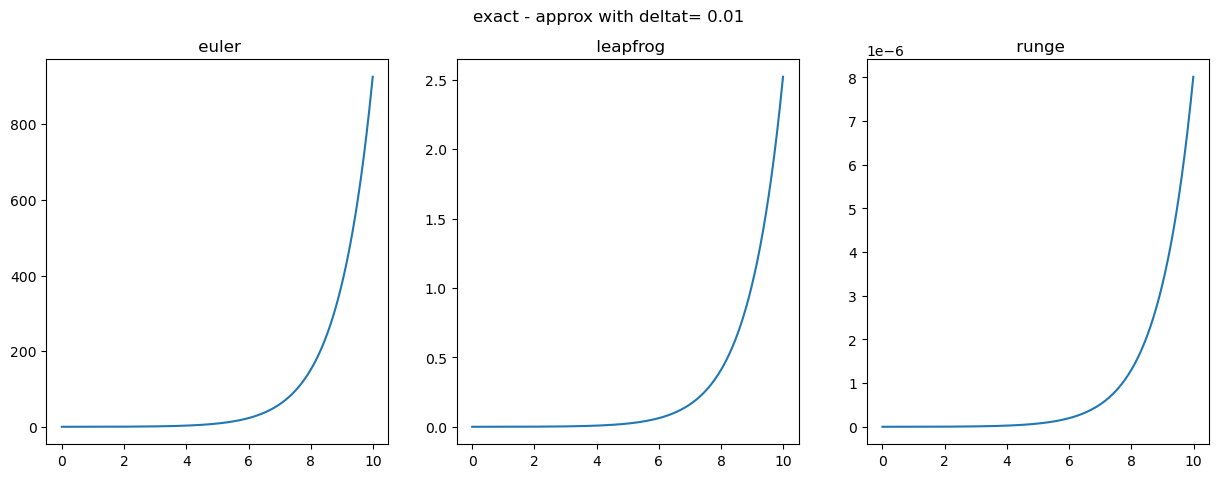

In [7]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 1000

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = [ 'euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

Use your 9 results to answer parts a and b below.

-   a\) Does increasing the order of the scheme, or decreasing the time step
    always improve the solution?

    Yes, with higher order schemes, and with decreasing step size, the accuracy increases.


-   b\) How would you compute the local truncation error from the error plot?
    And the global error? Do this on a plot for one set of parameters.

    Iterate over a series of fits for x^2, x^3, x^4... polynomials to find one that matches.
    The global error can be found by integrating a local error curve, which in theory should yield a polynomial curve one order lower.


-   c\) Similarly, how might you estimate the *order* of the local truncation
    error? The order of the global error? ( **Hint:** An order $p$ scheme
    has truncation error that looks like $c\cdot(\Delta t)^p$. Read the
    error off the plots for several values of the grid spacing and use this
    to find $p$.) Are the local and global error significantly different?
    Why or why not?


### Problem Stability

This example is a slight modification of [Problem accuracy](#Problem-Accuracy) from the previous section on accuracy. We will add one scheme (backward euler) and drop the 4th order Runge-Kutta, and change the focus from error to stability. The value of $\lambda$ is assumed a constant, so that the backward Euler scheme results in an explicit method, and we’ll also compute a bit further in time, so that any instability manifests itself more clearly. Run the [stability2.ipynb](https://github.com/rhwhite/numeric_2024/blob/main/numlabs/lab2/stability2.ipynb) notebook in numlabs/lab2 with $\lambda= -8\ s^{-1}$, with $\Delta t$ values that just straddle the stability condition for the forward euler scheme
($\Delta t < \frac{-2}{\lambda}$, derived below). Create plots that show that 
1) the stability condition does in fact predict the onset of the instablity in the euler scheme, and

The stability condition predicts the exact point where the instability does not decay with time step.

3) determine whether the backward euler and leap-frog are stable or unstable for the same $\Delta t$ values. (you should run out to longer than tend=10 seconds to see if there is a delayed instability.)

Backward Euler is stable for the range of values
Leapfrog is unstable throughout, and has a delayed instability that is progressively delayed with smaller timesteps.

and provide comments/markdown code explaining what you see in the plots.


In [8]:
# Define
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}

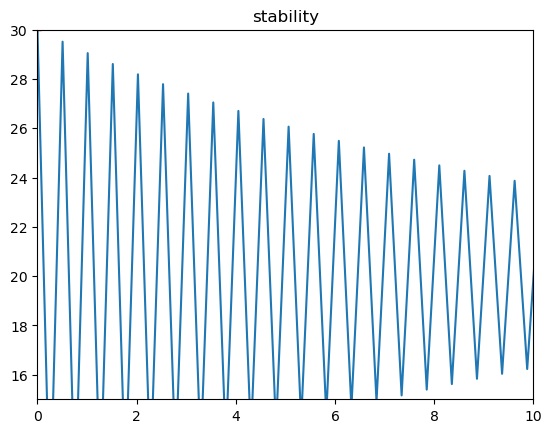

In [9]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=8.
    funChoice='beuler'
    npts=79
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()